### Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Training and Test Data

In [14]:
# Importing the data set
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
test = test_set.drop("SalePrice", axis=1)
mean = train_set.mean()
std = train_set.std()

# 
train = (train_set - mean) / std
test = (test - mean.drop("SalePrice")) / std.drop("SalePrice")

### Initialisation and Gradient Descent Function

In [15]:
# Initialising variables and lists
m = np.zeros(len(train.columns)-1) # M-gradient
b = 0 # B-gradient
L = 0.0001 # Learning Rate
cmse = 0
epochs = 1100 # epoch signifies number of iterations to reduce the error and make the function more accurate
msefunc = [0 for x in range(epochs)] # initialised list to store MSE values over different epochs

# Gradient Descent function
def gradient_descent(m_now, b_now, points, L):
    m_gradient = np.zeros(len(m_now))
    b_gradient = 0
    mse = 0
    cmse = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i][: -1].values
        y = points.iloc[i].SalePrice
        y_pred = np.dot(m_now,x) + b_now
        mse += (y_pred - y) ** 2
        cmse = (mse * std.SalePrice + mean.SalePrice)
        m_gradient += (-(2/n)) * x * (y - (m_now * x + b_now))
        b_gradient += (-(2/n)) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    cmse /= n/(10)
    temp=pd.Series(cmse)
    return m, b, temp[0]

# Calling the Gradient Descent function
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, train, L)
    msefunc[i] = cmse # appending values of MSE to a function to plot it to a graph later

Epoch: 0
MSE: 0
Epoch: 50
MSE: 742045.3384177202
Epoch: 100
MSE: 686855.2217099586
Epoch: 150
MSE: 635247.5545266374
Epoch: 200
MSE: 587126.6911842774
Epoch: 250
MSE: 542399.1246887795
Epoch: 300
MSE: 500973.4419704026
Epoch: 350
MSE: 462760.280028817
Epoch: 400
MSE: 427672.2829699921
Epoch: 450
MSE: 395624.05991702754
Epoch: 500
MSE: 366532.14377741166
Epoch: 550
MSE: 340314.9508494992
Epoch: 600
MSE: 316892.74125140795
Epoch: 650
MSE: 296187.5801557913
Epoch: 700
MSE: 278123.2998143446
Epoch: 750
MSE: 262625.4623561772
Epoch: 800
MSE: 249621.32334452684
Epoch: 850
MSE: 239039.79607656706
Epoch: 900
MSE: 230811.41661142174
Epoch: 950
MSE: 224868.30951172273
Epoch: 1000
MSE: 221144.1542844071
Epoch: 1050
MSE: 219574.15250668902


### Printing the values of m-gradient and b-gradient


In [16]:
print (f"M-gradient (theta): {m}")
print (f"B-gradient: {b}")


M-gradient (theta): [0.15537683 0.13970329 0.12702818 0.12694336 0.12008748 0.11910768
 0.11060037 0.10468744 0.10377671 0.09823225]
B-gradient: [ 2.64921904e-17  2.98876490e-17  2.95595701e-17  3.14443621e-17
  2.84972007e-17  3.34080833e-17  2.94384224e-17  3.05623333e-17
  1.78385715e-17 -2.45841474e-17]


### Linear Regression function for multiple parameters represented as a line

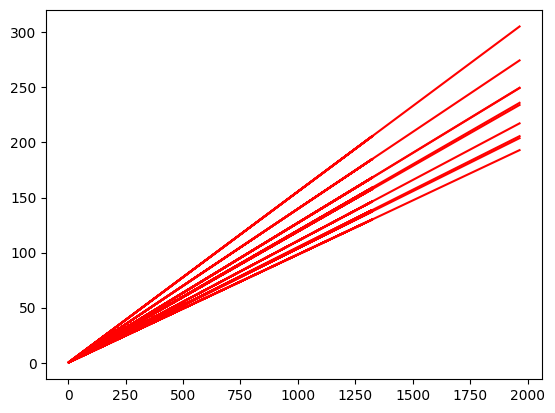

In [17]:
plt.plot (train_set.iloc[i][: -1].values, [np.dot(m, x) + b for x in train_set.iloc[i][: -1].values], color="red")
plt.show()

### Predictions

In [18]:
prediction = [np.dot(m,x) + b for x in test_set.drop("SalePrice", axis=1).values]
test_set['Predictions']= prediction
pred = []
k=0
for i in range (len(prediction)-1):
    if i%20 == 0:
        print(prediction [i][0])


1042.412136964631
943.8097804098891
833.9024597305107
865.0011958934667
1036.6328934662938
1138.383089639195
839.3667090008433
881.4656380438889
925.014821469352
841.9983547721951
956.054982384776
1207.4626886761105
925.8591612712795
794.6325237765943
783.9881003843014


### Graph to represent the variation of Mean Squared Error (MSE) over multiple Epochs

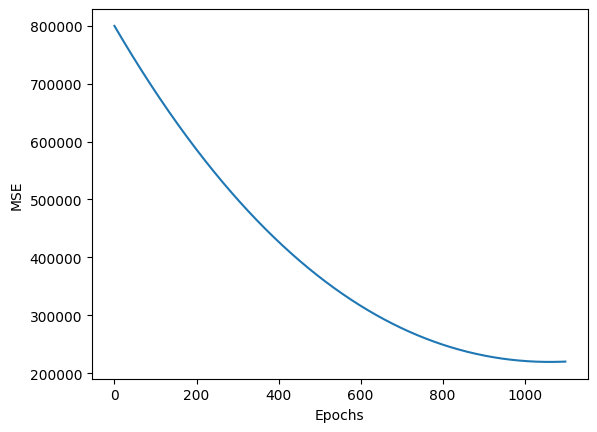


 Mean Squared Error: 220094.99562344572


In [19]:
plt.plot(range(epochs), msefunc)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
print (f"\n Mean Squared Error: {cmse}")